## Descrição do Problema

## Informações do dataset
- **`person_age`**: Idade do cliente
- **`person_income`**: Renda anual do cliente
- **`person_home_ownership`**: tipo de posse da residência (casa alugada, quitada ou em hipoteca)
- **`person_emp_length`**: anos trabalhados dos clientes
- **`loan_intent`**: finalidade do empréstimo
- **`loan_grade`**: grau do empréstimo
- **`loan_int_rate`**: taxa de juros do empréstimo
- **`loan_status`**: variável target dos modelos. 0 = pagou empréstimo 1 = não pagou;
- **`loan_percent_income`**: percentagem do empréstimo dividido pela renda anual do cliente
- **`cb_person_default_on_file`**: se possui histórico de inadimplência
- **`cb_person_cred_hist_length`**: histórico de crédito em anos

## Importando bibliotecas e dataframe

In [4]:
# para Tratamento e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from math import floor

pd.set_option('display.max_columns', None)
pd.options.plotting.backend = 'plotly'


# para ignorar avisos
import warnings
warnings.filterwarnings('ignore')


### Funções que serão utilizadas:

## Explorando o dataset

In [5]:
df_original = pd.read_csv('credit_risk_dataset.csv')
df = df_original.copy()
#colors = sns.color_palette('OrRd', len(df.columns)) # 'PuBu' # 'cubehelix'
colors = ['darkorange', 'firebrick']

In [6]:
# visualizando as primeiras 10 linhas
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [7]:
# exibindo tipos de colunas e dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.rename(columns={
    'person_age': 'idade_cliente',
    'person_income': 'renda_cliente',
    'person_home_ownership': 'posse_residencia_cliente',
    'person_emp_length': 'tempo_emprego_cliente',
    'loan_intent': 'finalidade_emprestimo',
    'loan_grade': 'nota_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros_emprestimo',
    'loan_status': 'status_emprestimo',
    'loan_percent_income': 'percentual_renda_emprestimo',
    'cb_person_default_on_file': 'historico_inadimplencia_cliente',
    'cb_person_cred_hist_length': 'tempo_credito_cliente'
}, inplace=True)

Substituimos os nomes das colunas para facilitar o entendimento

In [9]:
# colunas do dataset
df.columns

Index(['idade_cliente', 'renda_cliente', 'posse_residencia_cliente',
       'tempo_emprego_cliente', 'finalidade_emprestimo', 'nota_emprestimo',
       'valor_emprestimo', 'taxa_juros_emprestimo', 'status_emprestimo',
       'percentual_renda_emprestimo', 'historico_inadimplencia_cliente',
       'tempo_credito_cliente'],
      dtype='object')

In [10]:
df['finalidade_emprestimo'].replace({
    'DEBTCONSOLIDATION': 'Consolidação de Dívidas',
    'EDUCATION': 'Educação',
    'HOMEIMPROVEMENT': 'Melhoria da Casa',
    'MEDICAL': 'Médico',
    'PERSONAL': 'Pessoal',
    'VENTURE': 'Empreendimento'
}, inplace=True)

Traduzimos os motivos que originam os empréstimos.

In [11]:
df['posse_residencia_cliente'].replace({
    'MORTGAGE': 'Hipoteca',
    'OTHER': 'Outro',
    'OWN': 'Própria',
    'RENT': 'Alugada'
}, inplace=True)

Renomeamos os tipos de posses das moradias dos clientes.

In [12]:
# Dimensões do dataframe
df.shape

(32581, 12)

In [13]:
# exibindo estatísticas descritivas das features numéricas
df.describe()

,idade_cliente,renda_cliente,tempo_emprego_cliente,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,tempo_credito_cliente
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Com esta primeira exploração do dataset, é possível visualizar que:
- `df.shape`: O dataset engloba 32.581 linhas e 12 colunas
- `valor_emprestimo`: A média do valor dos empréstimos está em torno de 9.600 com desvio padrão de 6.300.
- `renda_cliente`: A renda dos clientes vai de 4 mil até 6 milhões, existem possíveis outliers.
- `percentual_renda_emprestimo`: O percentual do empréstimo sobre a renda possui valores mínimos iguais a zero, o que não é possível, visto que não há clientes com renda igual a zero. Isto significa que os percentuais mínimos do empréstimo sobre a renda devem ser verificados e tratados.
- `idade_cliente`: A feature idade possui outliers de clientes com 144 anos, respectivamente, um possível erro de entrada de dados.
- `tempo_emprego_cliente`: O tempo empregatício registrado dos clientes possui um outlier de 123 anos empregado, será tratado posteriormente.
- `.isnull().sum()`: Há dados nulos em `taxa_juros_emprestimo` e `tempo_emprego_pessoa`, trataremos mais à frente.
- Existem:
    - 3 colunas em formato float64
    - 5 colunas em formato int64
    - 4 colunas em formato object (strings)
    - O dataset utiliza 3.0 MB de memória, podemos reduzir isto alterando os tipos das colunas numéricas conforme abaixo:

In [14]:
print(f"{df['tempo_emprego_cliente'].isnull().sum()} dados nulos na variável: 'tempo_emprego_cliente'")
print(f"{df['taxa_juros_emprestimo'].isnull().sum()} dados nulos na variável: 'taxa_juros_empréstimo'")

895 dados nulos na variável: 'tempo_emprego_cliente'
3116 dados nulos na variável: 'taxa_juros_empréstimo'


Sabemos agora que os dados nulos representam:
- 895 clientes sem informação de tempo empregatício (`tempo_emprego_cliente`); e
- 3116 clientes sem informação de taxa de juros (`taxa_juros_emprestimo`).

Devemos tratá-los e após isso podemos alterar os tipos das colunas numéricas. Poderíamos inserir um valor .fillna(-1) e verificar depois a distribuição dessas features mais a fundo, porém como não são tantos valores de acordo com o tamanho do dataset, não é algo para se preocupar no momento.

In [15]:
# preenchemos taxa_emprego_cliente com o valor mais frequente
df['tempo_emprego_cliente'].fillna(df['tempo_emprego_cliente'].mode()[0], inplace=True)

# removemos os valores nulos e transformamos o tipo de taxa_juros_emprestimo por se tratar de uma variável de importante interpretação.
df['taxa_juros_emprestimo'] = df['taxa_juros_emprestimo'].replace({" ": np.nan}).fillna(-1).astype('float32')
df.drop(df[df['taxa_juros_emprestimo'] == -1].index, inplace=True)
df.reset_index(drop=True, inplace=True) # resetamos o index para não ir até 32580, mas sim até 29464

print(f"{df['tempo_emprego_cliente'].isnull().sum()} dados nulos após tratamento na variável numérica: tempo_emprego_cliente")
print(f"{df['taxa_juros_emprestimo'].isnull().sum()} dados nulos após tratamento na variável numérica: taxa_juros_empréstimo")
print(f"Restaram {df.shape[0]} linhas no dataset")

0 dados nulos após tratamento na variável numérica: tempo_emprego_cliente
0 dados nulos após tratamento na variável numérica: taxa_juros_empréstimo
Restaram 29465 linhas no dataset


Retiramos os valores nulos para não interferir na transformação de tipo de dados, faremos a transformação de mais algumas variáveis também:

In [16]:
# Convertendo historico_inadimplencia_cliente de object para int8, transformando "Y" e "N" para 1 e 0, respectivamente.
df['historico_inadimplencia_cliente'] = df['historico_inadimplencia_cliente'].replace({"Y": 1, "N": 0}).astype('int16')

# Convertendo status_emprestimo, idade_cliente e tempo_credito_cliente de int64 para int16
df['status_emprestimo'] = df['status_emprestimo'].replace({" ": np.nan}).fillna(0).astype('int16')
df['idade_cliente'] = df['idade_cliente'].replace({" ": np.nan}).fillna(0).astype('int16')
df['tempo_credito_cliente'] = df['tempo_credito_cliente'].replace({" ": np.nan}).fillna(0).astype('int16')

# Convertendo tempo_emprego_cliente de float64 para int16
df['tempo_emprego_cliente'] = df['tempo_emprego_cliente'].replace({" ": np.nan}).astype('int16')

# Convertendo percentual_renda_emprestimo de float64 para float32, evitando perder informações
df['percentual_renda_emprestimo'] = df['percentual_renda_emprestimo'].replace({" ": np.nan}).astype('float32')

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29465 entries, 0 to 29464
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   idade_cliente                    29465 non-null  int16  
 1   renda_cliente                    29465 non-null  int64  
 2   posse_residencia_cliente         29465 non-null  object 
 3   tempo_emprego_cliente            29465 non-null  int16  
 4   finalidade_emprestimo            29465 non-null  object 
 5   nota_emprestimo                  29465 non-null  object 
 6   valor_emprestimo                 29465 non-null  int64  
 7   taxa_juros_emprestimo            29465 non-null  float32
 8   status_emprestimo                29465 non-null  int16  
 9   percentual_renda_emprestimo      29465 non-null  float32
 10  historico_inadimplencia_cliente  29465 non-null  int16  
 11  tempo_credito_cliente            29465 non-null  int16  
dtypes: float32(2), int

,idade_cliente,renda_cliente,tempo_emprego_cliente,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente
count,29465.000000,2.946500e+04,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000
mean,27.714712,6.602047e+04,4.654268,9584.744612,11.011695,0.219379,0.170110,0.176922,5.788257
std,6.300193,6.190142e+04,4.171572,6316.272282,3.240459,0.413833,0.106879,0.381609,4.031987
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000
75%,30.000000,7.910000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.219999,1.000000,0.830000,1.000000,30.000000


In [17]:
# comparamos com o original para verificar se houve perda de informação ao transformar tipos de dados
df_original.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- No caso de `taxa_juros_emprestimo`, os dados nulos foram removidos e isso não altera nem a média nem o desvio padrão dela, mas de outras features, sim.
- No caso de `tempo_emprego_cliente`, os dados nulos foram preenchidos com o valor mais frequente, é esperado que a média e o desvio padrão diminuam um pouco.
- É esperado também que quando tratarmos os outliers de outras variáveis, assim como `tempo_emprego_cliente` e `idade_cliente`, a média e desvio padrão deles sofrerão alterações.

Conseguimos reduzir **1.4 MB de uso de memória** comparando com o dataset original tratando dados e transformando tipos de features. Para efeitos de EDA (Análise Exploratória de Dados) e posterior modelagem, trata-se de uma etapa importante em grandes bases de dados. Ao final da EDA reduziremos um pouco mais devido à encoding de features categóricas no momento de aplicar alguns modelos de Machine Learning.

# Análise Exploratória de Dados

In [18]:
columns = [col for col in df.columns if col != 'status_emprestimo'] + ['status_emprestimo']
df = df[columns]
df.columns

Index(['idade_cliente', 'renda_cliente', 'posse_residencia_cliente',
       'tempo_emprego_cliente', 'finalidade_emprestimo', 'nota_emprestimo',
       'valor_emprestimo', 'taxa_juros_emprestimo',
       'percentual_renda_emprestimo', 'historico_inadimplencia_cliente',
       'tempo_credito_cliente', 'status_emprestimo'],
      dtype='object')

Reposicionamos a variável target como sendo a última para facilitar a divisão em treino e teste futuramente.

### Análise Univariada

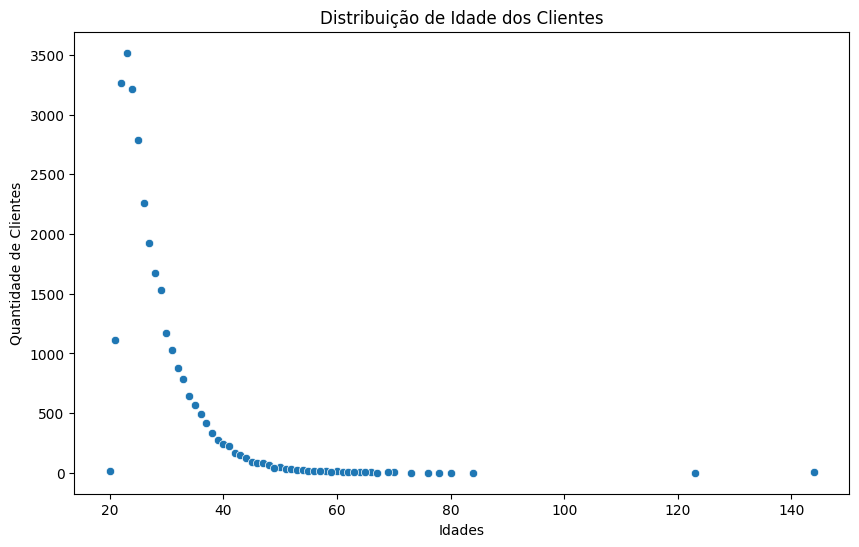

In [19]:
idades = df['idade_cliente'].value_counts().index
quantidades = df['idade_cliente'].value_counts().values

# Plotar com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=idades, y=quantidades, palette=colors)

# Configurações do gráfico
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idades')
plt.ylabel('Quantidade de Clientes')

plt.show()

- O scatter plot mostra que há clientes com 123 anos e clientes com 144 anos.
- O maior grupo de clientes possui 23 anos com 3889 instâncias.
- A população do dataset é composta majoritariamente por jovens e adultos entre 21 e 35 anos.

In [20]:
# Visualizamos os clientes que possuem idades maiores que o cliente mais idoso: 94 anos.
df[df['idade_cliente'] > 94]

,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo
74,144,250000,Alugada,4,Empreendimento,C,4800,13.57,0.02,0,3,0
164,144,200000,Hipoteca,4,Educação,B,6000,11.86,0.03,0,2,0
516,123,80004,Alugada,2,Educação,B,20400,10.25,0.25,0,3,0
29211,144,6000000,Hipoteca,12,Pessoal,C,5000,12.73,0.00,0,25,0


Confirmamos que as idades '123' e '144' anos identificadas possuem mais de uma aparição no dataset. Isso pode ocorrer por erro humano no preenchimento de dados. Neste caso poderiamos remover estes clientes do dataset ou simplesmente tratar as idades.
- Somente clientes maiores de idade podem solicitar um empréstimo, então os mesmos não poderiam ter '14' e '12' anos, dado que o cliente com a menor idade tem 20 anos.
- Neste caso, assumimos que os clientes possuem '23' e '44' anos, respectivamente.
    - 23 anos de idade é o maior dos grupos com participação majoritária no dataset.
    - 44 anos possui 141 instâncias no dataset.

In [21]:
# Tratamos
df[df['idade_cliente'] == 144] = df[df['idade_cliente'] == 144 ].replace({144: 44})
df[df['idade_cliente'] == 123] = df[df['idade_cliente'] == 123 ].replace({123: 23})

# Verificamos se há outliers após o tratamento
df[df['idade_cliente'] > 94]


,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo


O tratamento foi um sucesso e podemos também visualizar que antes do tratamento, o último cliente que possuía uma idade de 144 anos, recebe uma renda anual de 6 milhões. O que é totalmente possível, mas deve ser verificado dentro do nosso contexto se é um outlier ou não. 

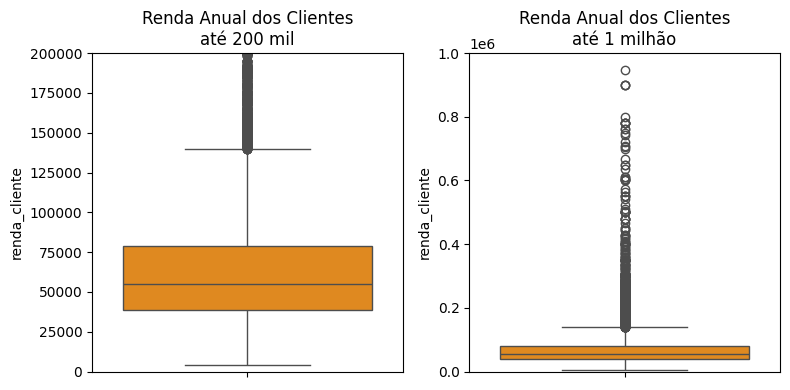

In [22]:
# Cria a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Primeiro boxplot (renda até 200 mil)
sns.boxplot(y='renda_cliente', data=df, palette=colors, ax=axes[0])
axes[0].set_title('Renda Anual dos Clientes\naté 200 mil')
axes[0].set_ylim(0, 200000)

# Segundo boxplot (renda até 6 milhões)
sns.boxplot(y='renda_cliente', data=df, palette=colors, ax=axes[1])
axes[1].set_title('Renda Anual dos Clientes\naté 1 milhão')
axes[1].set_ylim(0, 1000000)

# Mostra a figura
plt.tight_layout()
plt.show()

In [23]:
print(f'Quantidade de clientes que recebem MENOS que 135 mil: ' + str(df[df['renda_cliente'] < 135000].shape[0]))
print(f'Quantidade de clientes que recebem entre 135 e 500 mil: ' + str(df[df['renda_cliente'] < 500000].shape[0] - df[df['renda_cliente'] < 135000].shape[0]))
print(f'Quantidade de clientes que recebem entre 500 mil e 1 milhão: ' + str(df[df['renda_cliente'] < 1000000].shape[0] - df[df['renda_cliente'] < 500000].shape[0]))
print(f'Quantidade de clientes que recebem acima de 1 milhão: ' + str(df[df['renda_cliente'] >= 1000000].shape[0]))

Quantidade de clientes que recebem MENOS que 135 mil: 27848
Quantidade de clientes que recebem entre 135 e 500 mil: 1567
Quantidade de clientes que recebem entre 500 mil e 1 milhão: 43
Quantidade de clientes que recebem acima de 1 milhão: 7


In [24]:
# Exemplo caso as instâncias consideradas como outliers fossem retiradas
"""df_renda_aparada = df.copy()
df_renda_aparada.drop(df[df['renda_cliente'] >= 500000].index, inplace=True)"""
df.drop(df[df['renda_cliente'] >= 500000].index, inplace=True)
print(f'{df_original.shape[0] - df.shape[0]} linhas seriam retiradas.')
print(f"A média da renda anual cairia de {df_original['person_income'].mean():.2f} para {df['renda_cliente'].mean():.2f}")
print(f"O desvio padrão da renda anual cairia de {df_original['person_income'].std():.2f} para {df['renda_cliente'].std():.2f}")


3166 linhas seriam retiradas.
A média da renda anual cairia de 66074.85 para 64656.72
O desvio padrão da renda anual cairia de 61983.12 para 40728.53


Conclusão inicial sobre a renda:
- O IQR (intervalo interquartil) representa uma caixa pequena, significa que os outliers representam minoria no dataset, sendo as rendas acima de 135 mil consideradas como outliers pelo boxplot.
- Não é interessante retirarmos todos estes valores considerados outliers pelo gráfico box plot pois além de perder muita informação do dataset, podemos desenvolver um modelo que não possui uma boa performance na generalização de dados.
- Entendemos que principalmente os 58 clientes que recebem mais que 500 mil são os mesmos puxam o desvio padrão da renda anual exageradamente para cima.
- Dessa forma, dependendo do modelo de machine learning a ser utilizado, podemos decidir por manter somente os clientes que recebem entre 500 mil ou menos por ano, assim retirando 58 instâncias e diminuindo a média em aproximadamente 2600 e o desvio padrão em torno de 21mil da feature `renda_cliente`.

In [25]:
# Tratando os outliers da feature de contagem dos anos trabalhados de clientes
df[df['tempo_emprego_cliente'] > 40]

,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo
0,22,59000,Alugada,123,Pessoal,D,35000,16.02,0.59,1,3,1
187,21,192000,Hipoteca,123,Empreendimento,A,20000,6.54,0.10,0,4,0
29264,78,48000,Alugada,41,Médico,A,3000,7.51,0.06,0,25,0


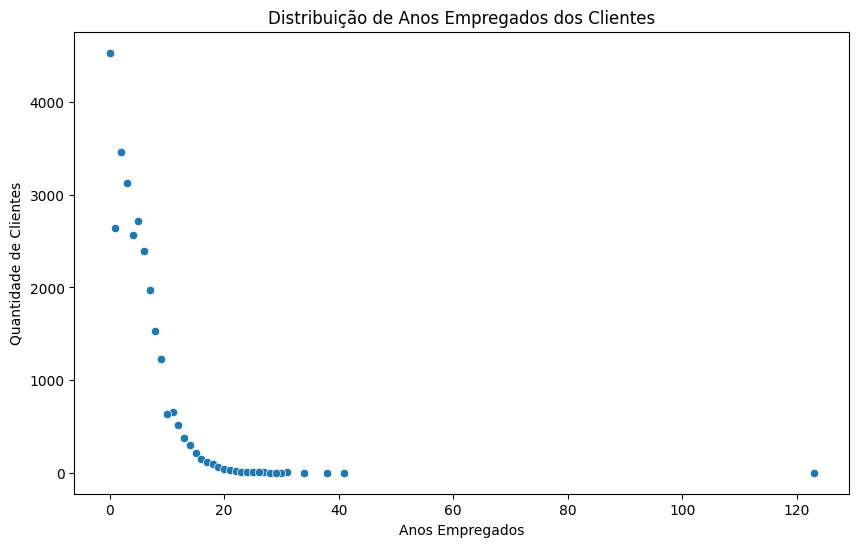

In [26]:
# Calcular as contagens de tempo_emprego_cliente
anos_empregados = df['tempo_emprego_cliente'].value_counts().index
quantidades = df['tempo_emprego_cliente'].value_counts().values

# Plotando com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=anos_empregados, y=quantidades, palette=colors)
plt.title('Distribuição de Anos Empregados dos Clientes')
plt.xlabel('Anos Empregados')
plt.ylabel('Quantidade de Clientes')

plt.show()

In [27]:
count = df[(df['tempo_emprego_cliente'] >= 20) & (df['tempo_emprego_cliente'] <= 25)].shape[0]
print(f"Quantidade de anos trabalhados registrados entre 20 e 25 anos: {count} clientes.")

Quantidade de anos trabalhados registrados entre 20 e 25 anos: 113 clientes.


- `tempo_emprego_cliente`: Há dois clientes com registros de 123 anos empregados, serão tratados como "23 anos empregados".
- Verificamos quantos clientes possuem em torno de 23 anos antes de tratar desta forma; e
- Possuimos 113 clientes na base de dados entre 20 e 25 anos trabalhados, portanto, é totalmente plausível substituir por este valor comum do nosso banco de dados.

In [28]:
# substituimos
df[df['tempo_emprego_cliente'] > 41] = df[df['tempo_emprego_cliente'] > 41].replace({123: 23})
# verificamos a alteraçõa
df[df['tempo_emprego_cliente'] > 41]

,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo


Substituimos com sucesso os registros de anos trabalhados consideradas como outliers.

In [29]:
# Tratando os clientes que possuem percentual de 0% do empréstimo sobre a renda
print(f"{df[df['percentual_renda_emprestimo'] <= 0].value_counts().sum()} clientes possuem uma razão de 0% do empréstimo sobre a renda.")
df[df['percentual_renda_emprestimo'] <= 0]

0 clientes possuem uma razão de 0% do empréstimo sobre a renda.


,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo


In [30]:
# executamos a divisão do valor_empréstimo pela renda de cada cliente
df.loc[df['percentual_renda_emprestimo'] <= 0, 'percentual_renda_emprestimo'] = \
    df.apply(lambda row: row['valor_emprestimo'] / row['renda_cliente'] if row['percentual_renda_emprestimo'] <= 0 else row['percentual_renda_emprestimo'], axis=1)

# verificamos após tratamento
print(f"{df[df['percentual_renda_emprestimo'] <= 0].value_counts().sum()} clientes possuem uma taxa de 0% do empréstimo sobre a renda.")
df.iloc[[16165, 17144, 25246, 27203, 28875, 28880, 28882, 29211]]

0 clientes possuem uma taxa de 0% do empréstimo sobre a renda.


,idade_cliente,renda_cliente,posse_residencia_cliente,tempo_emprego_cliente,finalidade_emprestimo,nota_emprestimo,valor_emprestimo,taxa_juros_emprestimo,percentual_renda_emprestimo,historico_inadimplencia_cliente,tempo_credito_cliente,status_emprestimo
16168,29,10000,Própria,0,Pessoal,B,3250,11.12,0.33,0,9,1
17153,31,29000,Hipoteca,6,Pessoal,D,5000,15.99,0.17,0,7,0
25266,27,42504,Alugada,2,Pessoal,B,7200,10.59,0.17,0,9,0
27233,43,71015,Alugada,8,Empreendimento,B,5000,11.14,0.07,0,14,0
28915,37,74568,Alugada,0,Pessoal,C,6000,14.26,0.08,1,16,0
28920,38,110000,Própria,6,Empreendimento,C,12000,12.99,0.11,0,11,0
28922,38,18720,Própria,22,Empreendimento,B,2500,11.86,0.13,0,16,0
29257,55,39000,Alugada,2,Melhoria da Casa,B,13000,11.48,0.33,0,27,1


**`percentual_renda_emprestimo`**: Após o tratamento, o percentual dos clientes envolvidos varia entre 0.0833% e 0.4143%.

In [31]:
features_numericas = df.nunique()[df.nunique() > 7].index
features_categoricas = df.nunique()[df.nunique() <= 7].index[:-1]
print(features_numericas)
print(features_categoricas)

Index(['idade_cliente', 'renda_cliente', 'tempo_emprego_cliente',
       'valor_emprestimo', 'taxa_juros_emprestimo',
       'percentual_renda_emprestimo', 'tempo_credito_cliente'],
      dtype='object')
Index(['posse_residencia_cliente', 'finalidade_emprestimo', 'nota_emprestimo',
       'historico_inadimplencia_cliente'],
      dtype='object')


Defini que para efeitos de análise, as variáveis categóricas serão aquelas com 7 ou menos valores únicos dentro da mesma feature. Utilizaremos daqui há pouco para facilitar a visualização dos dados.

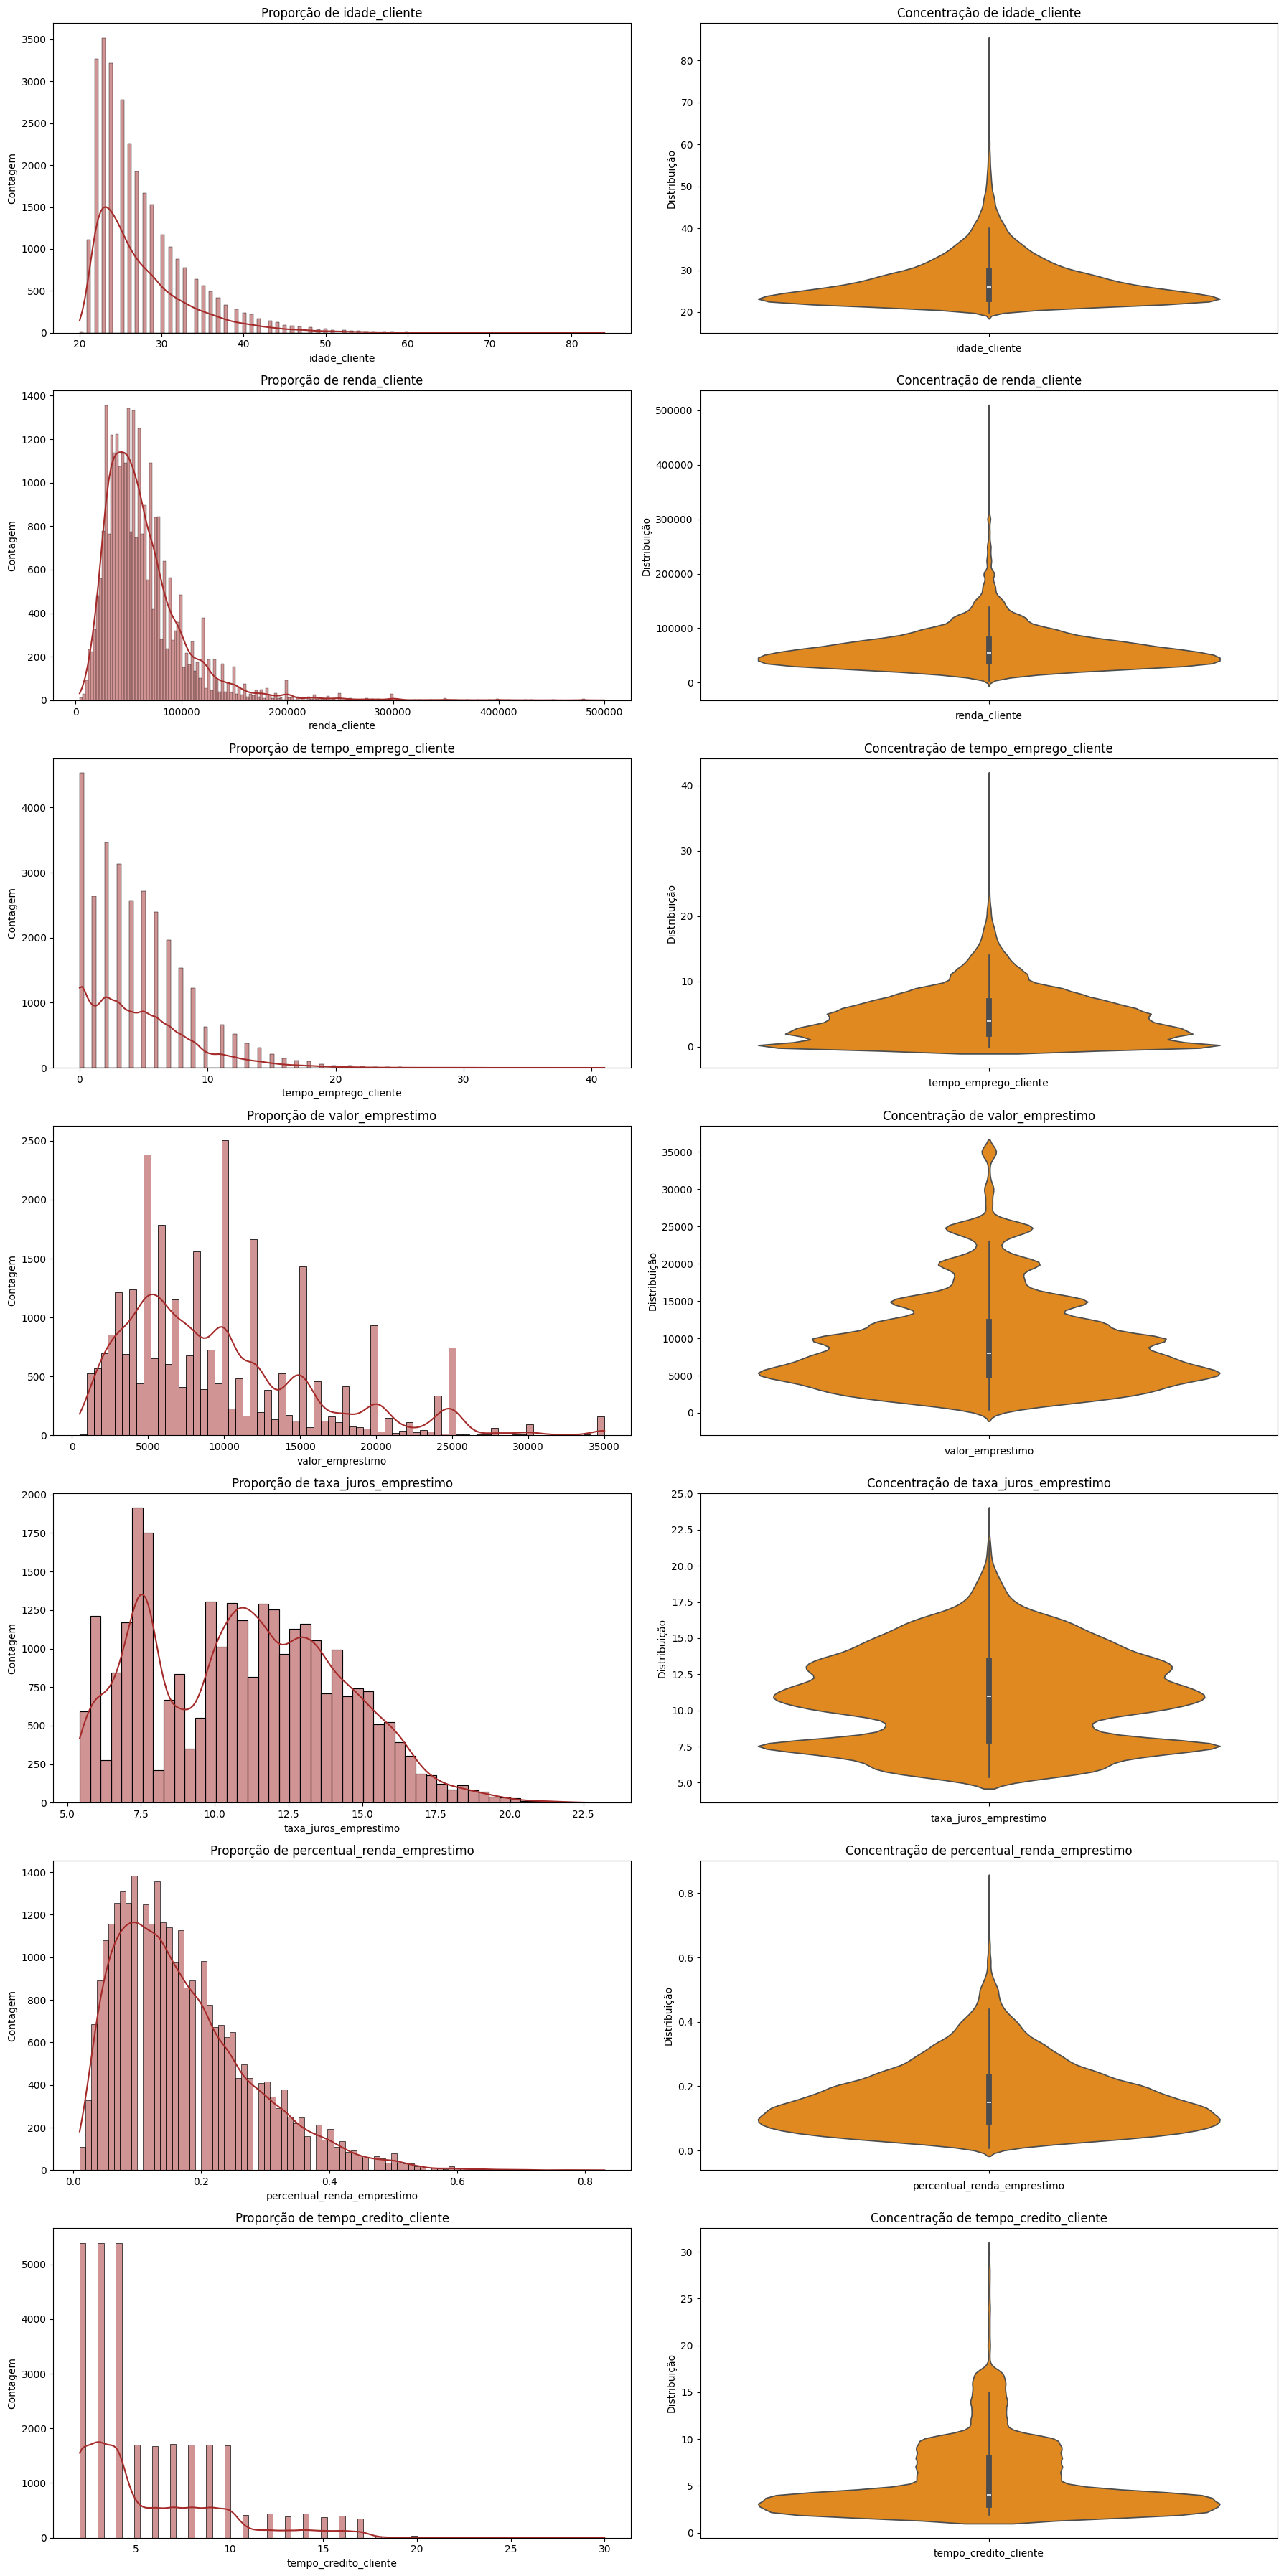

In [32]:
# Cria uma figura com 3 linhas e 2 colunas de subplots
fig, axes = plt.subplots(7, 2, figsize=(18, 36))

for i, feature in enumerate(features_numericas): # features_numericas[2:]
    # Calcula a posição da subplot
    row = i
    col_0plot, col_1plot = 0, 1 #  col_2plot = 2
    
    sns.histplot(data=df[feature], color='brown', ax=axes[row, col_0plot], kde=True);
    title_histplot = 'Proporção de ' + feature
    axes[row, col_0plot].set_title(title_histplot)
    axes[row, col_0plot].set_ylabel('Contagem')
    axes[row, col_0plot].set_xlabel(feature)
    
    # Violinplots
    sns.violinplot(y=df[feature], ax=axes[i, col_1plot], inner='box', palette=colors);
    title_violinplot = 'Concentração de ' + feature
    axes[row, col_1plot].set_title(title_violinplot)
    axes[row, col_1plot].set_ylabel('Distribuição')
    axes[row, col_1plot].set_xlabel(feature)
    
"""    # Boxplots
    sns.boxplot(y=df[feature], ax=axes[row, col_2plot], palette=colors);
    title_boxplot = 'Distribuição de ' + feature
    axes[row, col_2plot].set_title(title_boxplot)
    axes[row, col_2plot].set_ylabel('')
    axes[row, col_2plot].set_xlabel(feature)"""

# Mostra todos os gráficos
plt.tight_layout()
plt.show();

- Todas as features envolvidas possuem uma **assimetria positiva, uma cauda à direita**.
- O **gráfico KDE (Kernel Density Estimate)** imbutido no histograma mostra a curva das variáveis contínuas mais suavizadas mostrando que é uma medida mais eficiente da comparação entre valores que devemos nos aprofundar posteriormente. Ele demonstra uma grande diferença das curvas se comparado com a distribuição dos gráficos de violino.
- **`idade_cliente`**: A população do dataset é composta majoritariamente por jovens e adultos entre 21 e 35 anos.
    - O maior grupo de clientes possui 23 anos com 3889 instâncias.
- **`renda_cliente`**: Como vimos anteriormente, a quantidade de clientes que recebem MENOS que 135 mil por ano é o grupo predominante com 27.848 instâncias.
    - Enquanto os que recebem entre 135 a 500 mil são aproximadamente 1530 clientes.
- **`tempo_emprego_cliente`**: A maior concentração de tempo empregatício que se encontra em `emprego_tempo_cliente` está entre 0 e 10 anos.
    - O valor máximo está em 40 anos, o que é plausível pensando no caso do Brasil em que dependendo do ramo trabalhado, uma pessoa se aposenta com direito à aposentadoria com 35 anos de serviço. O que nos leva a assumir que não há outliers neste contexto.
- **`valor_emprestimo`**: Os valores de empréstimos se concentram aproximadamente entre 2 mil e 15 mil. O maior valor de empréstimo fornecido é de 35000 para poucos clientes e não há outliers.
- **`taxa_juros_emprestimo`**: A concentração de dados está em 7,5% e entre 10% a 15% de juros anual.
    - A taxa de juros do empréstimo mostra que há pelo menos um cliente com 23% de juros ao ano, que é a maior taxa.
    - A escala relativa de tempo não é conhecida, mas presumimos que está em anos.
- **`percentual_renda_emprestimo`**: A concentração dos dados se encontra entre 1% e 30%; e
    - É possível visualizar que não há mais uma quantia considerável de clientes dentro da faixa de 0%. 
- **`tempo_credito_cliente`**: Metade do dataset está entre 0 e 5 anos e 1/3 do dataset está entre 5 e 10 anos de tempo de crédito do cliente.
    - O valor máximo está em aproximadamente 30 anos. Assumimos que não há outliers neste contexto.
    - Não sabemos a escala relativa de tempo, mas supomos que está em anos.

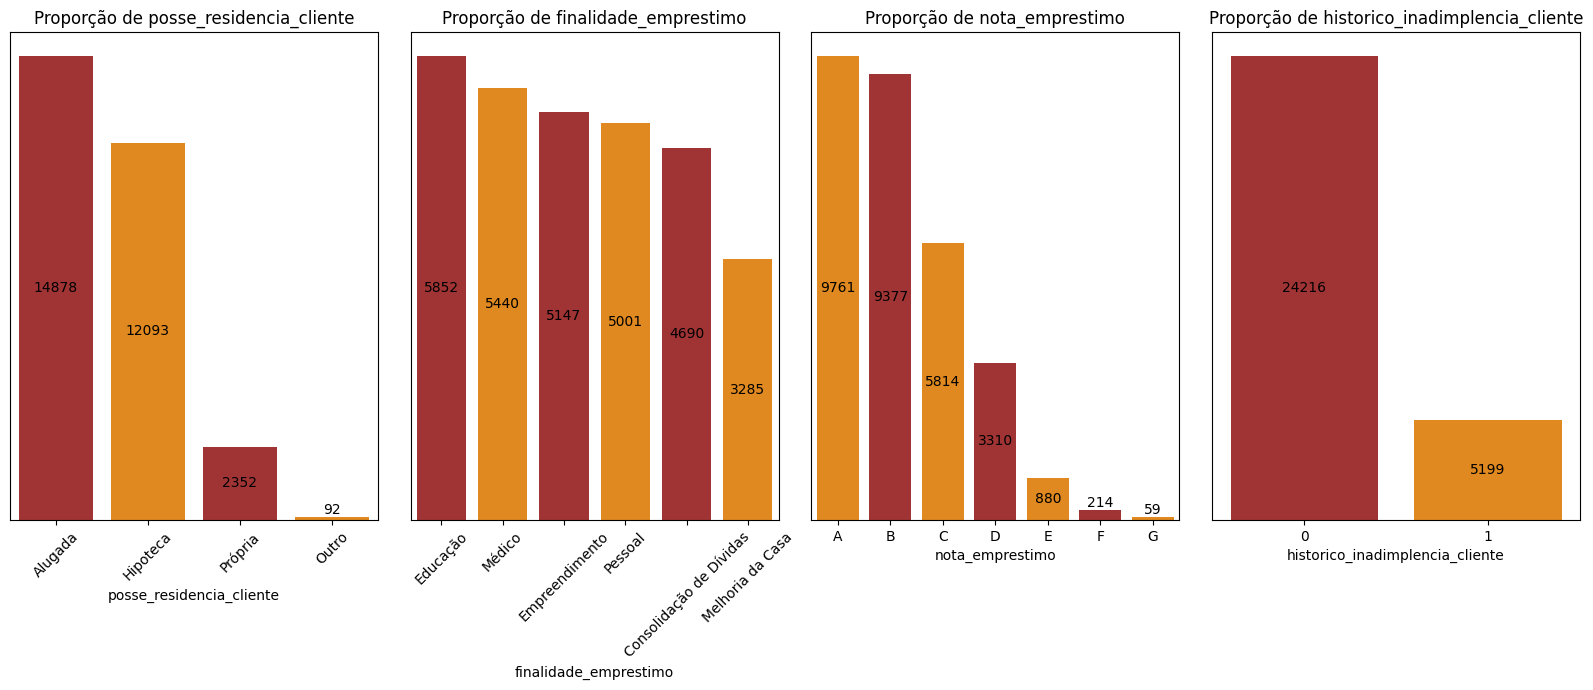

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(16,7))

for k in range(len(features_categoricas)):
    plt.subplot(1, 4, k+1)
    feature = features_categoricas[k]
    x = df[feature].value_counts().index
    y = df[feature].value_counts().values
    bars = sns.barplot(x=x, y=y, hue=y, palette=colors, legend=False)
    plt.yticks([])
    plt.ylabel('')
    plt.title(f"Proporção de {feature}", fontsize=5)
    
    if feature in ['posse_residencia_cliente', 'finalidade_emprestimo']:
        plt.xticks(rotation=45)

    # Adicionar os valores nas barras
    for i in range(len(x)):
        if y[i] < 500:
            plt.text(i, y[i], str(y[i]), ha='center', va='bottom', fontsize=10, color='black')
        else:
            plt.text(i, y[i] / 2, str(y[i]), ha='center', va='center', fontsize=10, color='black')
        
    
    plt.tight_layout()
    plt.title("Proporção de " + feature)

In [34]:
# Contagem de clientes com histórico de inadimplência bom e ruim
hist_cred_bom = df[df['historico_inadimplencia_cliente'] == 0].shape[0]
hist_cred_ruim = df[df['historico_inadimplencia_cliente'] == 1].shape[0]

# Cálculo da porcentagem de clientes com histórico de crédito ruim em relação ao total
percent_cred_ruim = (hist_cred_ruim / (hist_cred_bom + hist_cred_ruim)) * 100
proporcao_cred = df['historico_inadimplencia_cliente'].value_counts()[0]/df['historico_inadimplencia_cliente'].value_counts()[1]


# Impressão dos resultados
print(f'{hist_cred_ruim} clientes com história de crédito ruim correspondem a {percent_cred_ruim:.2f}% do total de clientes.\nCom uma proporção de {proporcao_cred:.2f}, aproximadamente {round(proporcao_cred)}:1.')

5199 clientes com história de crédito ruim correspondem a 17.67% do total de clientes.
Com uma proporção de 4.66, aproximadamente 5:1.


Das variáveis categóricas, podemos concluir inicialmente que:
- **`posse_residencia_cliente`**: A maioria dos clientes alugam moradias e possuem hipoteca.
- **`finalidade_emprestimo`**:  finalidade dos empréstimos possui uma leve assimetria à direita, sendo os três maiores motivos de solicitar empréstimo: Educação, Médico e Empreendimento.
- **`nota_emprestimo`**: As notas de empréstimos mais presentes no dataframe são do tipo "A", "B" e "C".
- **`historico_inadimplencia_cliente`**: podemos visualizar um desbalanceamento dos dados exibindo **5.199** clientes (21.47%) com histórico de crédito ruim sendo minoria, é uma minoria com uma proporção de **a cada 5 clientes um possui histórico de inadimplência.**

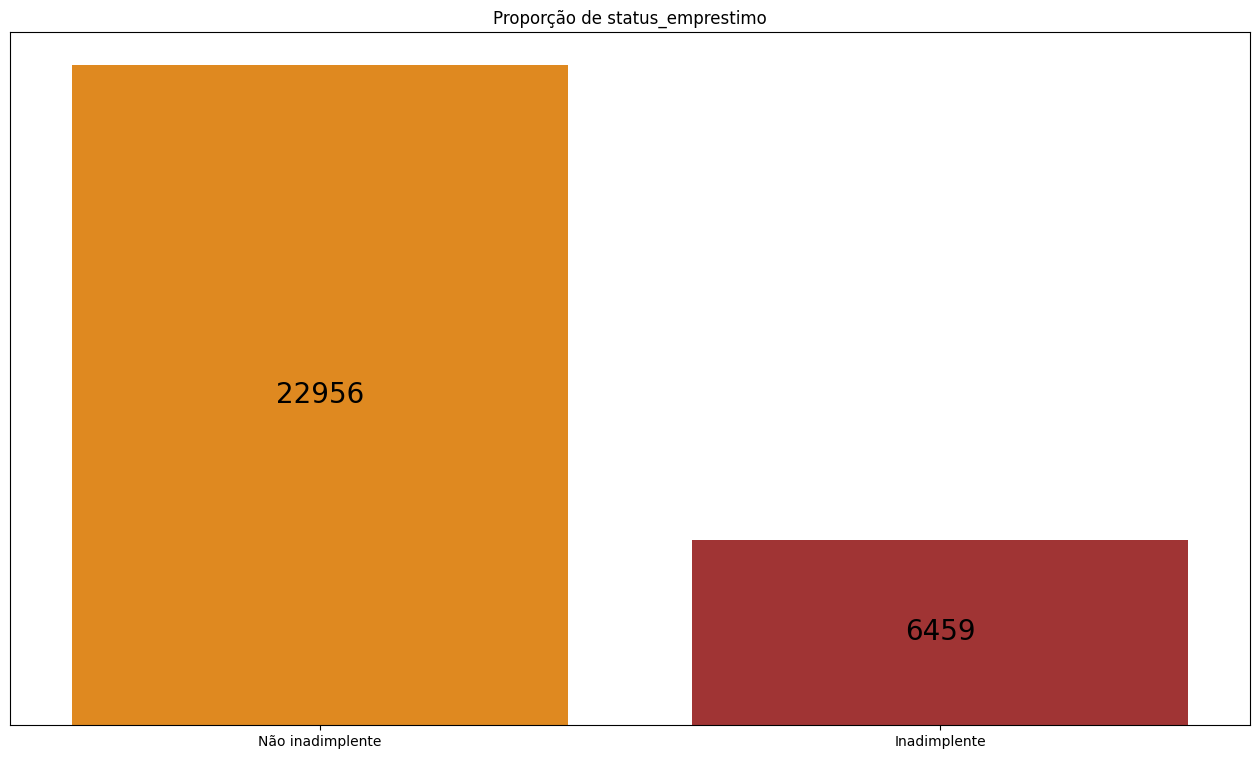

In [35]:
# Analisando o target
plt.figure(figsize=(16,9))
target_value_counts = df['status_emprestimo'].value_counts()
sns.barplot(x=['Não inadimplente','Inadimplente'], y=target_value_counts.values, palette=colors)
plt.title('Proporção de status_emprestimo')
plt.ylabel('')
plt.yticks([])
for i in range(len(x)):
    plt.text(i, target_value_counts.values[i] / 2, str(target_value_counts.values[i]), ha='center', va='center', fontsize=20, color='black')
plt.show();

In [36]:
status_nao_inadimplente = df[df['status_emprestimo'] == 0].shape[0]
status_inadimplente = df[df['status_emprestimo'] == 1].shape[0]
percent_status_inadimplente = (status_inadimplente / (status_nao_inadimplente + status_inadimplente))*100
proporcao = df['status_emprestimo'].value_counts()[0]/df['status_emprestimo'].value_counts()[1]
print(f'{status_inadimplente} clientes inadimplentes correspondem a {percent_status_inadimplente:.2f}% do total de clientes.\nCom uma proporção de {proporcao:.2f}, aproximadamente {round(proporcao)}:1.')

6459 clientes inadimplentes correspondem a 21.96% do total de clientes.
Com uma proporção de 3.55, aproximadamente 4:1.


- **`status_emprestimo`**: A variável alvo afirma novamente o desbalanceamento dos dados exibindo **6.459** clientes (21.96%) que estão classificados como inadimplentes com uma proporção de **a cada 4 clientes um é inadimplente.**

### Análise Bivariada

In [65]:
# Separando as features por grupos
financeiro_cliente = ['renda_cliente', 'valor_emprestimo', 'taxa_juros_emprestimo', 'percentual_renda_emprestimo']
credito_cliente = ['tempo_credito_cliente', 'finalidade_emprestimo', 'nota_emprestimo', 'historico_inadimplencia_cliente']
dados_cliente = ['idade_cliente', 'tempo_emprego_cliente', 'posse_residencial_cliente']
categoricas_cliente = ['finalidade_emprestimo', 'nota_emprestimo', 'posse_residencial_cliente']

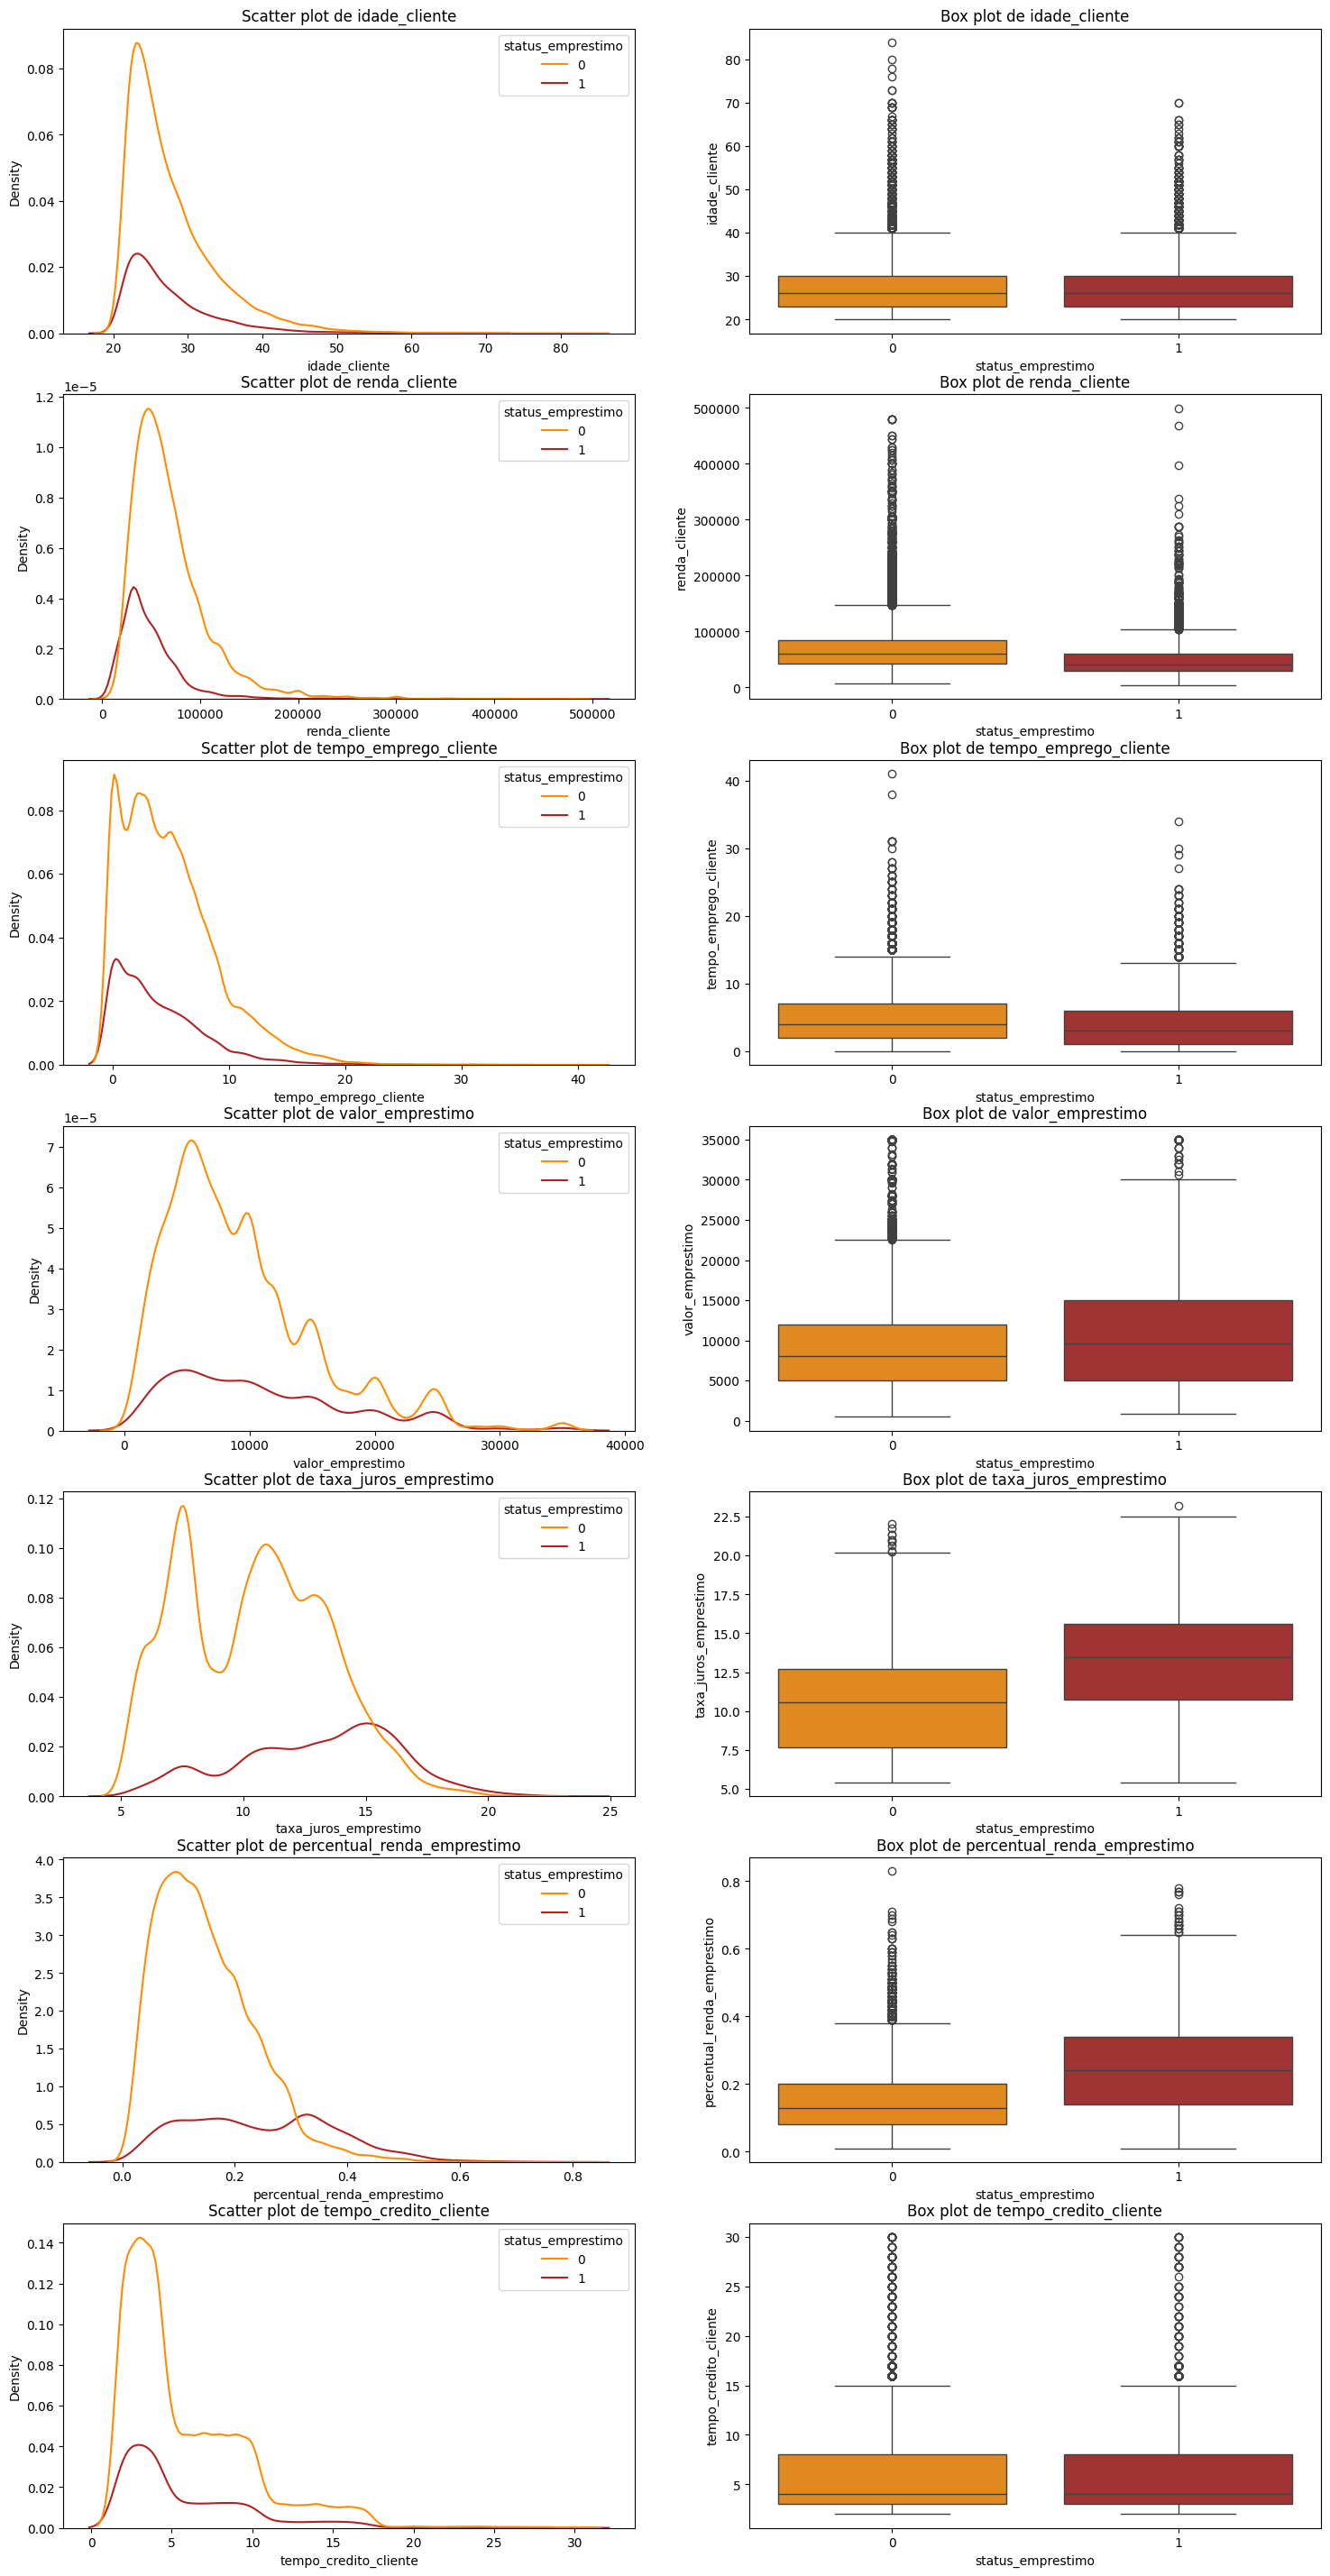

In [38]:
# Cria uma figura com 3 linhas e 2 colunas de subplots
fig, axes = plt.subplots(7, 2, figsize=(18, 36))

for i, feature in enumerate(features_numericas): # features_numericas[2:]
    # Calcula a posição da subplot
    row = i
    col_0plot, col_1plot = 0, 1 #  col_2plot = 2
    
    # floor(i/2) para percorrer todos os dados sem faltar nenhum.
    sns.kdeplot(x=df[feature], data=df, ax=axes[row, col_0plot], hue='status_emprestimo', palette=colors)
    title_kdeplot = 'Scatter plot de ' + feature
    axes[row, col_0plot].set_title(title_kdeplot)
    
     # Boxplots
    sns.boxplot(x='status_emprestimo', y=df[feature], ax=axes[row, col_1plot], data=df, palette=colors);
    title_boxplot = 'Box plot de ' + feature
    axes[row, col_1plot].set_title(title_boxplot)

# Mostra todos os gráficos
#plt.tight_layout()
plt.show();

### Comentar a interpretação dos KDE plots juntamente dos boxplots por cada **`status_emprestimo`**.

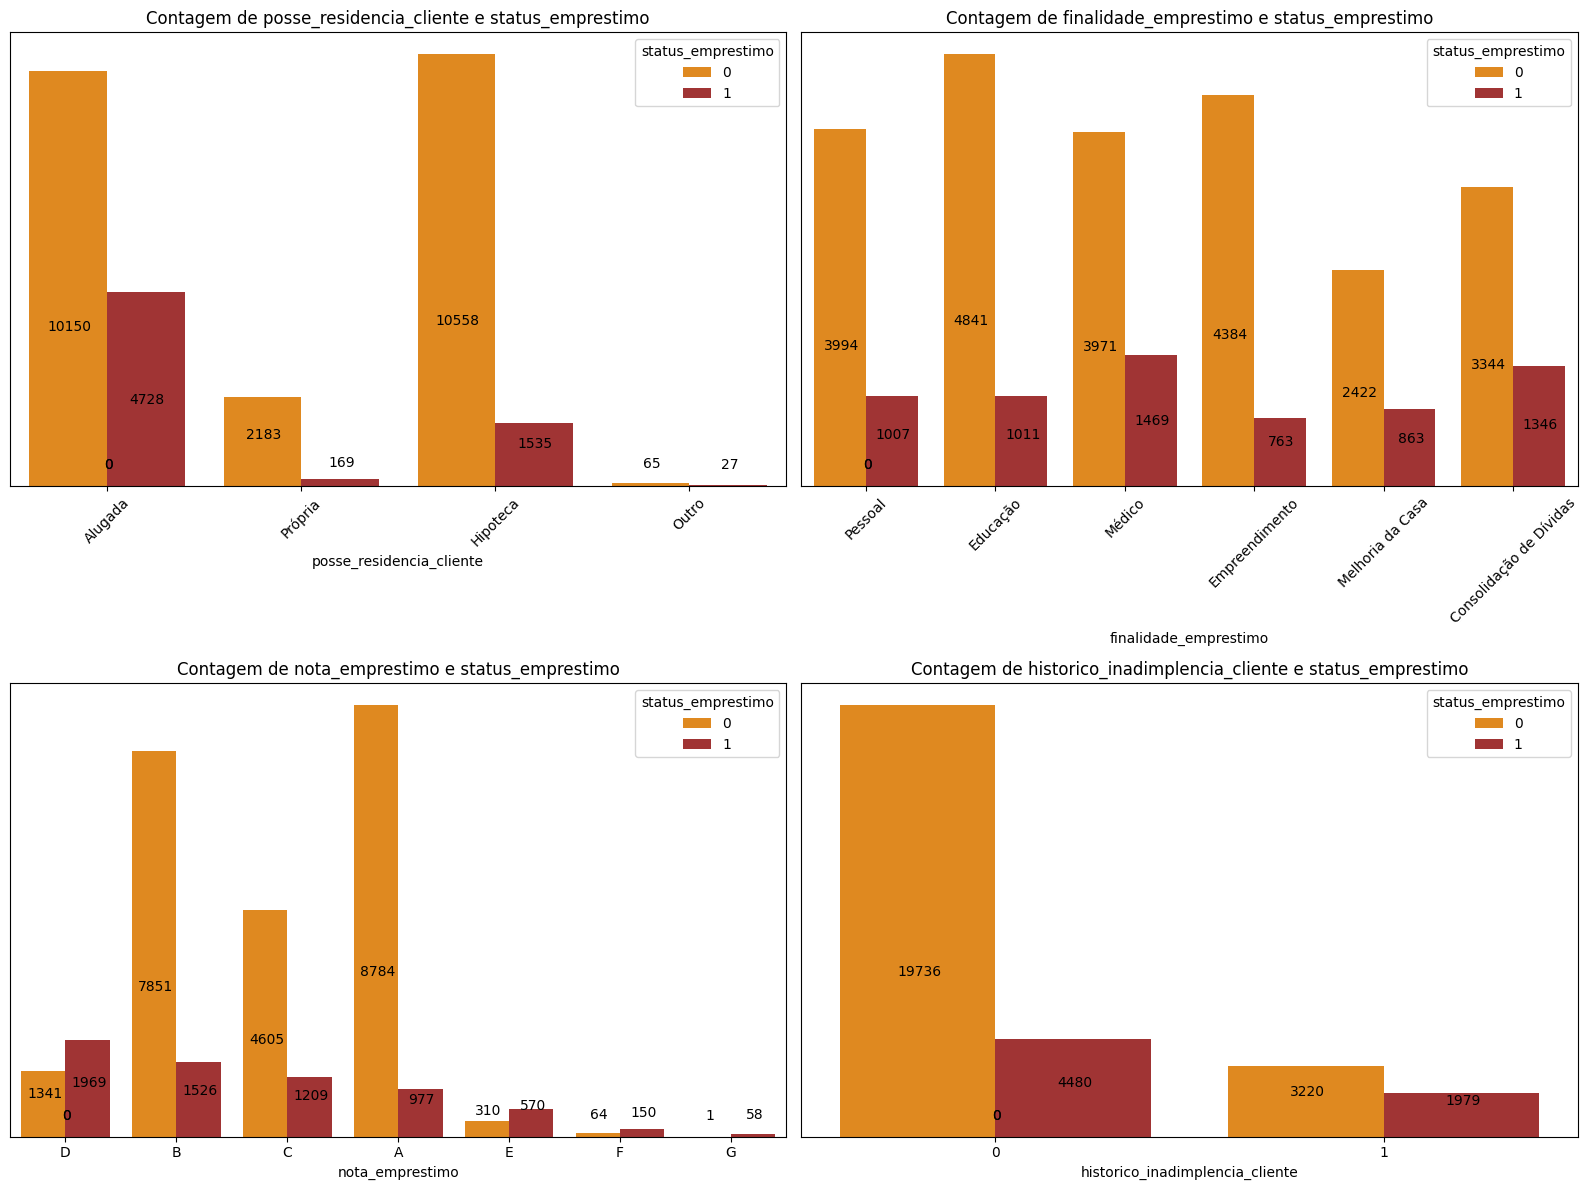

In [88]:
# criando um pairplot
#sns.pairplot(df, vars=['valor_emprestimo','taxa_juros_emprestimo', 'percentual_renda_emprestimo'], hue='status_emprestimo', palette=colors)
#plt.show();
fig, ax = plt.subplots(2, 2, figsize=(16,12))

for k in range(len(features_categoricas)):
    plt.subplot(2, 2, k+1)
    feature = features_categoricas[k]
    bars = sns.countplot(x=feature, data=df, hue='status_emprestimo', palette=colors)
    plt.yticks([])
    plt.ylabel('')
    plt.title(f"Contagem de {feature} e status_emprestimo", fontsize=12)
    if feature in ['posse_residencia_cliente', 'finalidade_emprestimo']:
        plt.xticks(rotation=45)
        
    # Adicionar anotações nas barras
    for p in bars.patches:
        bars.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()/3.), 
                      ha = 'center', va = 'bottom',
                      xytext = (1, 10), 
                      textcoords = 'offset points')
        
    
    plt.tight_layout()
plt.show();

### Inserir interpretação dos countplots de acordo com o **`status_emprestimo`**

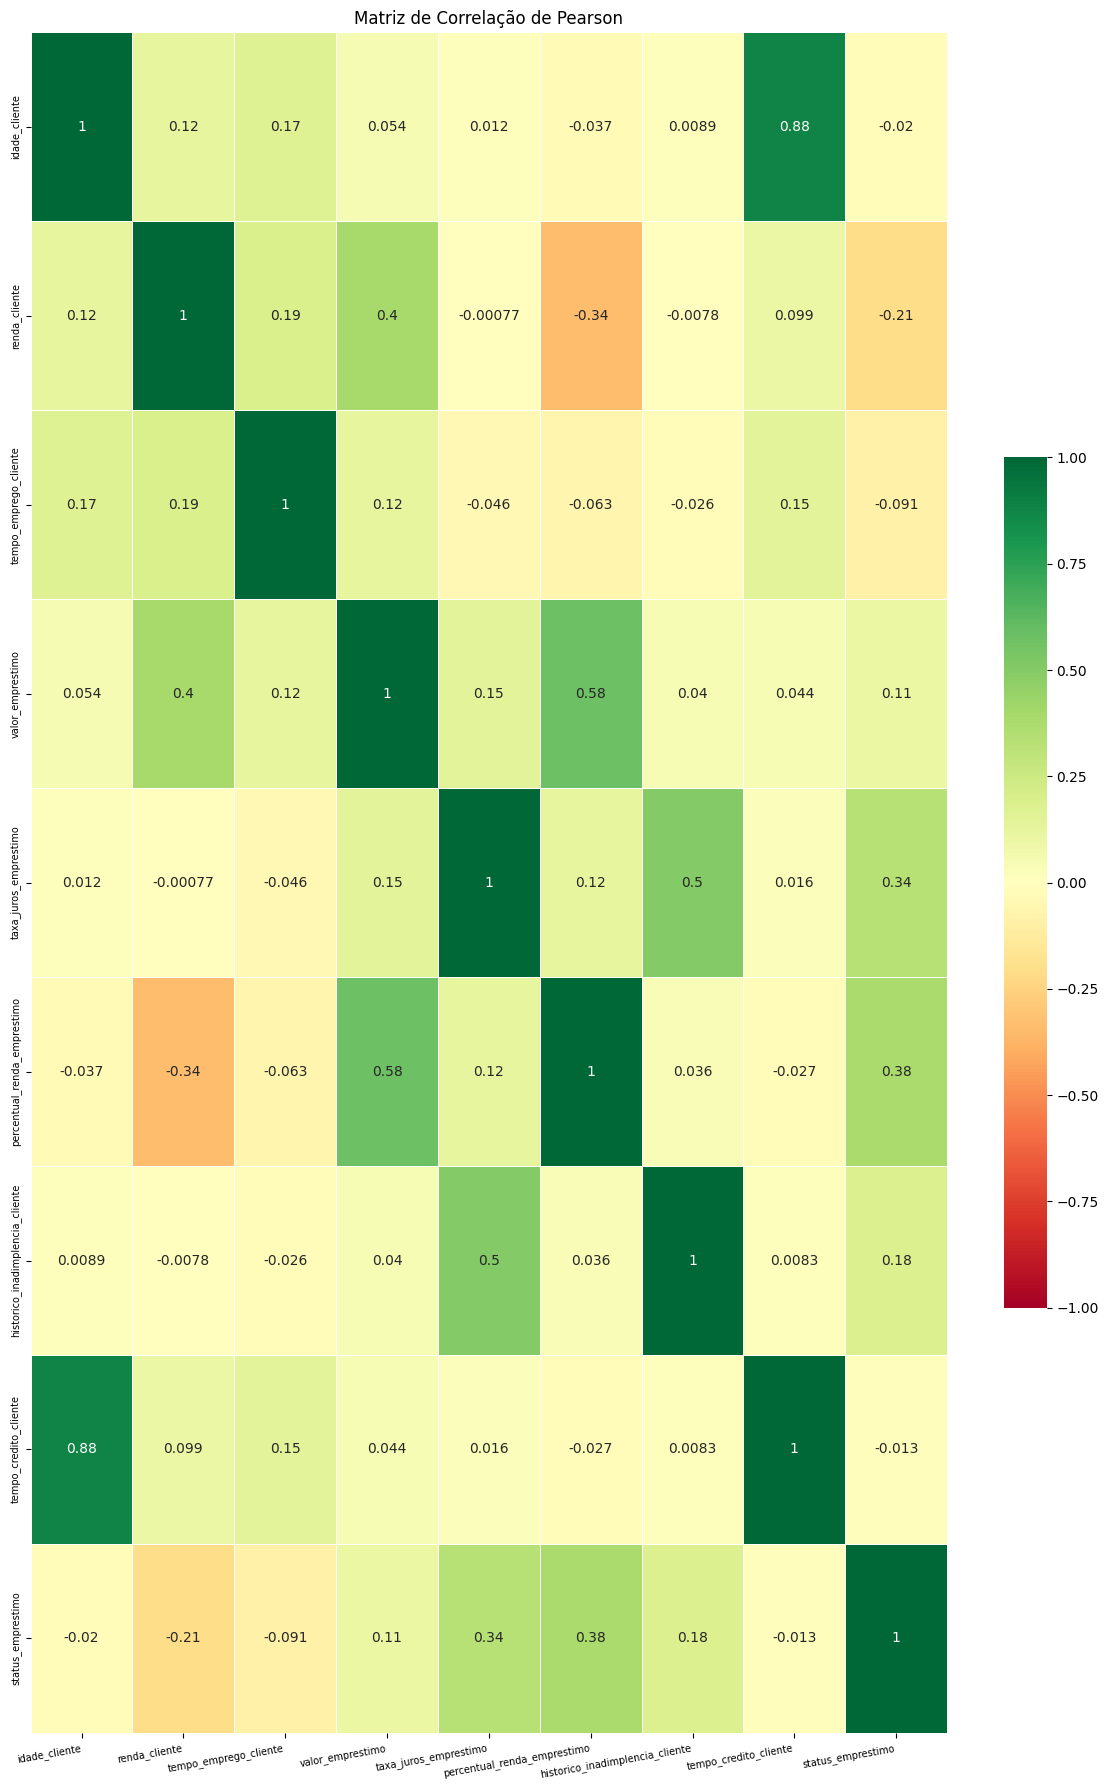

In [64]:
plt.figure(figsize=(12,18))
# Selecionar apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calcular a matriz de correlação de Pearson
corr_matrix = df[numeric_cols].corr()

sns.heatmap(data=corr_matrix,annot=True, cmap='RdYlGn', vmin=-1, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=10, ha='right', fontsize=7)
plt.yticks(rotation=90, fontsize=7)
plt.title('Matriz de Correlação de Pearson')
plt.tight_layout()
plt.show();

### Inserir Interpretação da correlação de pearson no arquivo modelagem após encoding de variáveis categóricas.

In [ ]:
sns.pairplot(df, vars=dados_cliente, hue='status_emprestimo', palette=colors)
plt.show();

#### Variáveis Numéricas

#### Variáveis Categóricas

# Conclusão